In [1]:
import numpy as np

**chapter2 のパーセプトロンでは、重みを引数として与えてあげる必要があった ↓**

In [2]:
def AND(x1, x2):
    x_vec = np.array([x1, x2])
    w_vec = np.array([0.5, 0.5])
    bias= -0.7
    tmp = np.sum(x_vec * w_vec) + bias
    if tmp <= 0:
        return 0
    else:
        return 1

**そこを推論する仕組みがNNらしい**

**↑のように、ある閾値でずばっと0|1を分ける関数を、活性化関数と呼ぶらしい。ここで、よく使うものをまとめる**

In [26]:
def step_func(x):
    if x > 0:
        return 1
    else:
        return 0

def sigmoid_func(x):
    return 1/(1+np.exp(-x))


def relu_func(x):
    return np.maxmum(0, x)

**非線形なのが重要. 線形だといくつ重ねても: y=h(h(h(x)))で、h(x) = cx の時、 y = c^3x となり、多層にする必要がない**

**NNでも、行列演算で表記することが可能. 試しにnpで3層NNを表現してみる**

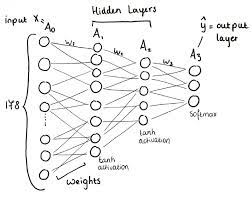

In [30]:
class nn_3layers():
    def __init__(self):
        _network = {}
        # weight 
        _network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
        _network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
        _network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
        # bias
        _network['b1'] = np.array([0.1, 0.2, 0.3])
        _network['b2'] = np.array([0.1, 0.2])
        _network['b3'] = np.array([0.1, 0.2])
        self.network = _network      

    def forward(self, x):
        W1, W2, W3 = self.network['W1'],self.network['W2'],self.network['W3']
        b1, b2, b3 = self.network['b1'],self.network['b2'],self.network['b3']

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid_func(a1)
        a2 = np.dot(z1, W2) + b2
        z2 = sigmoid_func(a2)
        a3 = np.dot(z2, W3) + b3
        self.a3 = a3

    def identity_func(self):
        return self.a3


In [31]:
my_nn = nn_3layers()
my_nn.forward(np.array([1.0, 0.5]))
result = my_nn.identity_func()
print(result)

[0.31682708 0.69627909]


**できた.**

**出力層を作ってみる**

In [32]:
def softmax_func(a):
    c = np.max(a)
    exp_a = np.exp(a - c) # overflow対策
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y